# Automotive Industry in Canada - Exploratory Data Analisis 

### Team members

• Vaibahv Chaudhary <br>
• Neha Dewangan <br>
• Harold Epinosa <br>
• Adebola Olaberinjo <br>
• Mahima Gupta <br>

This project aims to carry out an exploratory analysis of various data sets in order to understand the automotive industry in Canada and help investors interested in this industry to understand sales behavior from different angles.

### Data sets
Each of the data sets were downloaded from the official statistics website of Canada. 

#### D1- New motor vehicle sales 
• Release date: 2021-10-10 <br>
• https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2010000101 <br>
• This dataset contains information on passenger car and truck sales by province and by manufacturing origin.

#### D2- Retail trade sales of motor vehicle and parts  dealers 
• Release date: 2021-10-22 <br>
• https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2010000803 <br>
• This dataset contains information about retail sales by new car dealers, use car dealers, automotive parts and other vehicle dealers.

#### D3- New motor vehicle registrations
• Release date: 2021-07-27 <br>
• https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2010002101 <br>
• This dataset contains information about vehicle registrations like battery electric cars, Hybrid electric, and plug-in hybrid electric cars.

#### D4- Financial estimates of motor vehicle and parts dealers
• Release date: 2021-02-17 <br>
• https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2010006602 <br>
• This dataset contains information about financial information of dealers form D2, like gross margin, closing and opening inventory, costo of goods sold, among others. 

#### D5- Population estimates
• Release date: 2021-10-27 <br>
• https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1710000901 <br>
• This dataset contains information about population by province. 

All data sets have different date ranges. For the purpose of our analysis, we will work with a range of 5 years, from 2015 to 2019.

### Packages
For this project we are using the below pacakages:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Exploratory Data Analisys 
## D1- New motor vehicle sales

In [2]:
#Import data
D1 = pd.read_csv('D1- New motor vehicle sales.csv')

C:\Users\harol\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
#Check first records
D1.head()

,REF_DATE,GEO,DGUID,Vehicle type,Origin of manufacture,Sales,Seasonal adjustment,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1946-01,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,2756.0,NaN,NaN,NaN,0
1,1946-01,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Dollars,Unadjusted,Dollars,81,thousands,3,v42169913,1.1.1.2.1,4507.0,NaN,NaN,NaN,0
2,1946-01,Canada,2016A000011124,Passenger cars,"Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169920,1.2.1.1.1,1102.0,NaN,NaN,NaN,0
3,1946-01,Canada,2016A000011124,Passenger cars,"Total, country of manufacture",Units,Seasonally adjusted,Units,300,units,0,v42169921,1.2.1.1.2,1468.0,NaN,NaN,t,0
4,1946-01,Canada,2016A000011124,Passenger cars,"Total, country of manufacture",Dollars,Unadjusted,Dollars,81,thousands,3,v42169922,1.2.1.2.1,1604.0,NaN,NaN,NaN,0


Analyzing the first records of this data set, we observe that it contains information that is not useful for our analysis. Therefore, in the following code the cleaning of this data set is carried out, considering the following criteria:

• Split the date in two colums for easy analisis. (Year and Month) <br>
• Drop columns that are not necessary for our analysis <br>
• Remove rows that are not necessary for our analysis (The totals) <br>
• Filtering by year to keep the same year range in all data sets (2015-2019) <br>

In [4]:
#Split the Ref Date in two columns
D1split = pd.DataFrame(D1.REF_DATE.str.split('-',1).tolist(),
                                 columns = ['Year','Month',])

#Join the result in the original data set
D1join = D1split.join(D1)

#Drop the column 
D1drop = D1join.drop(columns=['REF_DATE', 'DGUID', 'Seasonal adjustment', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'])

#Change data type of year
D1drop['Year'].astype('int32').dtypes

#Remove unnecessary rows
D1Clean = D1drop[(D1drop['Year'] >= '2015') & (D1drop['Year'] <= '2019') & (D1drop['GEO'] != 'Canada') & (D1drop['Vehicle type'] != 'Total, new motor vehicles') & (D1drop['Origin of manufacture'] != 'Total, country of manufacture') & (D1drop['Origin of manufacture'] != 'Total, overseas')]


In [5]:
#Check first records of the clean data
D1Clean.head()

,Year,Month,GEO,Vehicle type,Origin of manufacture,Sales,VALUE
134400,2015,01,Newfoundland and Labrador,Passenger cars,North America,Units,296.0
134401,2015,01,Newfoundland and Labrador,Passenger cars,North America,Dollars,6772.0
134404,2015,01,Newfoundland and Labrador,Passenger cars,Japan,Units,NaN
134405,2015,01,Newfoundland and Labrador,Passenger cars,Japan,Dollars,NaN
134406,2015,01,Newfoundland and Labrador,Passenger cars,Other countries,Units,NaN


In the previous result it can be seen that in the variable "VALUE" there are two types of value, units and dollars. Therefore, we consider it necessary to change the variables Units and Dollars to columns for better analysis.

In [6]:
#Create Units column
Units = D1Clean[D1Clean['Sales'] == 'Units']\
.drop(columns=['Year', 'Month', 'GEO', 'Vehicle type', 'Origin of manufacture', 'Sales'])\
.rename(columns={'VALUE':'Units'})

#Create Dollars data set
Dollars = D1Clean[D1Clean['Sales'] == 'Dollars']\
.drop(columns=['Sales'])\
.rename(columns={'VALUE':'Sales'})

#Insert the Units column to the Dollars data set
Dollars.insert(loc=6, column='Units', value=Units)

#Change data set name
D1Clean1 = Dollars

#Check data set
D1Clean1

,Year,Month,GEO,Vehicle type,Origin of manufacture,Sales,Units
134401,2015,01,Newfoundland and Labrador,Passenger cars,North America,6772.0,296.0
134405,2015,01,Newfoundland and Labrador,Passenger cars,Japan,NaN,NaN
134407,2015,01,Newfoundland and Labrador,Passenger cars,Other countries,NaN,NaN
134411,2015,01,Newfoundland and Labrador,Trucks,North America,NaN,NaN
134423,2015,01,Prince Edward Island,Passenger cars,North America,2410.0,102.0
...,...,...,...,...,...,...,...
148865,2019,12,Alberta,Trucks,North America,578998.0,10443.0
148877,2019,12,British Columbia and the Territories,Passenger cars,North America,86162.0,2064.0
148881,2019,12,British Columbia and the Territories,Passenger cars,Japan,9605.0,302.0
148883,2019,12,British Columbia and the Territories,Passenger cars,Other countries,43442.0,828.0


Now that the dataset contains the information we require for analysis, we will proceed with the validation of the data types and missing data

### Checking data types and missing data

In [7]:
D1Clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2400 entries, 134401 to 148887
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   2400 non-null   object 
 1   Month                  2400 non-null   object 
 2   GEO                    2400 non-null   object 
 3   Vehicle type           2400 non-null   object 
 4   Origin of manufacture  2400 non-null   object 
 5   Sales                  2064 non-null   float64
 6   Units                  2064 non-null   float64
dtypes: float64(2), object(5)
memory usage: 150.0+ KB


For the purpose of this analysis, the data type appears to be correct, so in terms of this criterion no modification is necessary. <br>

However, we note that the 'Sales and Units' variables appears to have missing data.

In [8]:
D1Clean1.isnull().sum()

Year                       0
Month                      0
GEO                        0
Vehicle type               0
Origin of manufacture      0
Sales                    336
Units                    336
dtype: int64

Considering the above, we decided to delete the rows with missing data. This, taking into account that the missing data means that the observation had no car sales, in the period of time related in the data set.

In [9]:
#Remove null values
D1Clean3 = D1Clean1[D1Clean1['Sales'].notna() & D1Clean1['Units'].notna()] 

In [10]:
#Check null values again
D1Clean3.isnull().sum()

Year                     0
Month                    0
GEO                      0
Vehicle type             0
Origin of manufacture    0
Sales                    0
Units                    0
dtype: int64

In [11]:
#Check the clean data set
D1Clean3

,Year,Month,GEO,Vehicle type,Origin of manufacture,Sales,Units
134401,2015,01,Newfoundland and Labrador,Passenger cars,North America,6772.0,296.0
134423,2015,01,Prince Edward Island,Passenger cars,North America,2410.0,102.0
134445,2015,01,Nova Scotia,Passenger cars,North America,16232.0,667.0
134449,2015,01,Nova Scotia,Passenger cars,Japan,1591.0,59.0
134451,2015,01,Nova Scotia,Passenger cars,Other countries,6106.0,225.0
...,...,...,...,...,...,...,...
148865,2019,12,Alberta,Trucks,North America,578998.0,10443.0
148877,2019,12,British Columbia and the Territories,Passenger cars,North America,86162.0,2064.0
148881,2019,12,British Columbia and the Territories,Passenger cars,Japan,9605.0,302.0
148883,2019,12,British Columbia and the Territories,Passenger cars,Other countries,43442.0,828.0


### Analyzing Numeric Variables

In [12]:
#Analisis of Units variable
round(D1Clean3['Units'].describe())

count     2064.0
mean      4179.0
std       7706.0
min         17.0
25%        335.0
50%       1257.0
75%       3600.0
max      51912.0
Name: Units, dtype: float64

In [13]:
#Analisis of Dollars variable
round(D1Clean3['Sales'].describe())

count       2064.0
mean      168080.0
std       336560.0
min          443.0
25%        10102.0
50%        40858.0
75%       148844.0
max      2528241.0
Name: Sales, dtype: float64

In the statistical analysis of the variables units and sales, a large range of numbers is observed between the minimum number and the maximum number. This is because the observation represents the total sales for a particular month of a specific type of product and with a defined manufacturing origin. <br>

This makes the numerical analysis for these two variables unclear. So we decided to create a new column establishing the unit price of the cars.

In [14]:
Unit_price = round(D1Clean3.Sales / D1Clean3.Units)

In [15]:
D1Clean3.insert(loc=7, column='Unit_price', value=Unit_price)

In [16]:
D1Clean3

,Year,Month,GEO,Vehicle type,Origin of manufacture,Sales,Units,Unit_price
134401,2015,01,Newfoundland and Labrador,Passenger cars,North America,6772.0,296.0,23.0
134423,2015,01,Prince Edward Island,Passenger cars,North America,2410.0,102.0,24.0
134445,2015,01,Nova Scotia,Passenger cars,North America,16232.0,667.0,24.0
134449,2015,01,Nova Scotia,Passenger cars,Japan,1591.0,59.0,27.0
134451,2015,01,Nova Scotia,Passenger cars,Other countries,6106.0,225.0,27.0
...,...,...,...,...,...,...,...,...
148865,2019,12,Alberta,Trucks,North America,578998.0,10443.0,55.0
148877,2019,12,British Columbia and the Territories,Passenger cars,North America,86162.0,2064.0,42.0
148881,2019,12,British Columbia and the Territories,Passenger cars,Japan,9605.0,302.0,32.0
148883,2019,12,British Columbia and the Territories,Passenger cars,Other countries,43442.0,828.0,52.0


In [17]:
#Analisis of Unit_price variable
D1Clean3['Unit_price'].describe()

count    2064.000000
mean       35.320736
std         8.361607
min        22.000000
25%        28.000000
50%        33.000000
75%        43.000000
max        71.000000
Name: Unit_price, dtype: float64

The above result is clearer for the context of our data set. 2064 observations are observed, where the minimum price per unit is 22 thousand dollars and the maximum price is 71 thousand dollars. This makes sense, since our dataset contains sales of passenger cars and trucks.

Now we will see the distribution of this variable:

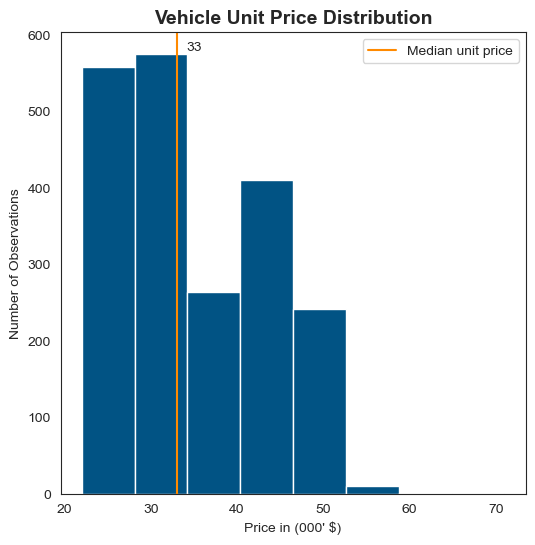

In [18]:
#Calculate median
median_unitprice = np.median(D1Clean3['Unit_price'])

#Plot
sns.set_style("white")

fig, ax=plt.subplots(figsize = (6, 6))

plt.hist(D1Clean3["Unit_price"], 
         bins = 8, 
        color = "#015384")
plt.title('Vehicle Unit Price Distribution', fontsize = 14, weight = 'bold')
plt.xlabel("Price in (000' $)")
plt.ylabel("Number of Observations")

ax.axvline(median_unitprice, color='#FF8A00', label="Median unit price")
ax.legend()

plt.annotate('33', xy=(20, 1),  xycoords='data',
            xytext=(0.27, 0.96), textcoords='axes fraction')
plt.show()

According to the result, there is a greater concentration of variables towards the left side of the plot. This means that this distribution is skewed to the right. In the context of the data set, it means that most vehicles are below 50 thousand, with a few with a value greater than 60 thousand, which can refer to trucks.

Now, we want to find the relationship between the Units and Sales:

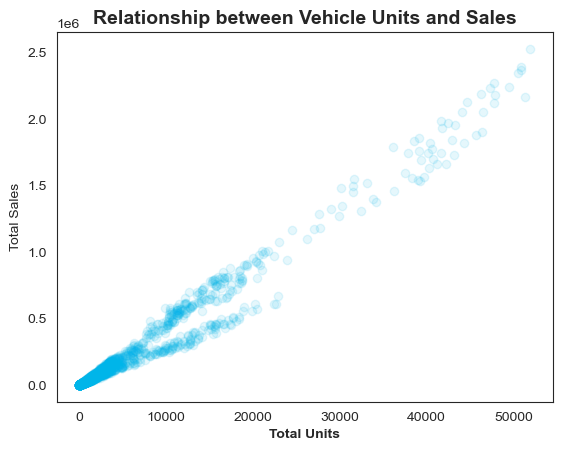

In [19]:
scatter = plt.scatter(D1Clean3['Units'],
           D1Clean3['Sales'],
           alpha = 0.1,
                     color = '#00B5E9')
plt.title("Relationship between Vehicle Units and Sales",
         fontsize = 14,
         weight = 'bold')
plt.xlabel("Total Units", weight = 'bold')
plt.ylabel("Total Sales ")
plt.show()

In the plot it can be seen that there is a strong relationship between total sales and total units sold.

### Analyzing Categorical Variables

#### GEO Column 

It column represents the provinces of Canada. This variable has 2064 observations with 10 uniques values

In [20]:
D1Clean3['GEO'].describe()

count            2064
unique             10
top       Nova Scotia
freq              240
Name: GEO, dtype: object

The next output shows the distribution of the provinces in this data set

In [21]:
D1Clean3.GEO.value_counts()

Nova Scotia                             240
Quebec                                  240
Ontario                                 240
Manitoba                                240
Saskatchewan                            240
Alberta                                 240
British Columbia and the Territories    240
New Brunswick                           192
Newfoundland and Labrador                96
Prince Edward Island                     96
Name: GEO, dtype: int64

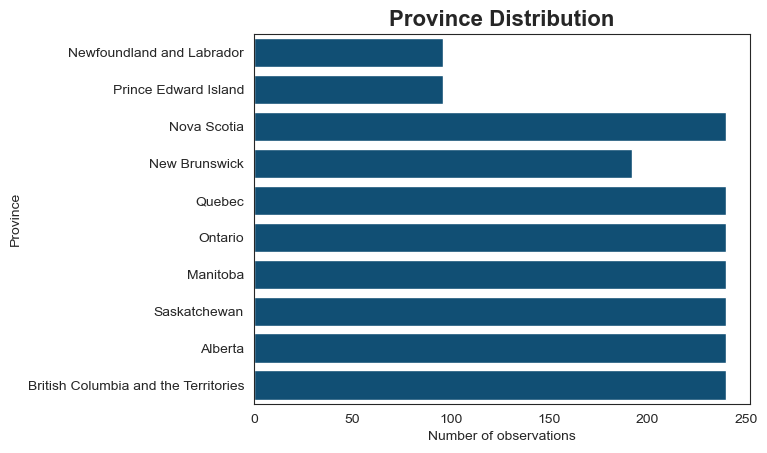

In [22]:
sns.countplot(data=D1Clean3, y='GEO', color = '#015384')
plt.title("Province Distribution", fontsize = 16, fontweight = 'bold')
plt.xlabel("Number of observations", fontsize = 10)
plt.ylabel("Province", fontsize = 10)
plt.show()

#### Vehicle Type Column 

It column represents the vehicle type sold. This variable has 2064 observations with 2 uniques values

In [23]:
D1Clean3['Vehicle type'].describe()

count               2064
unique                 2
top       Passenger cars
freq                1512
Name: Vehicle type, dtype: object

The next output shows the distribution of the Vehicle Type in this data set

In [24]:
D1Clean3['Vehicle type'].value_counts()

Passenger cars    1512
Trucks             552
Name: Vehicle type, dtype: int64

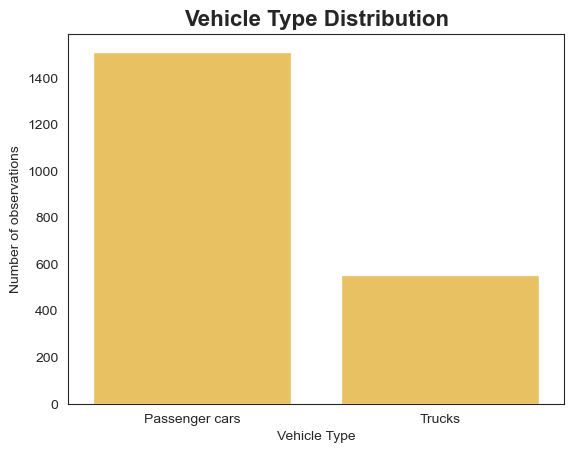

In [25]:
sns.countplot(data=D1Clean3, x='Vehicle type', color = '#FECB4C')
plt.title("Vehicle Type Distribution", fontsize = 16, fontweight = 'bold')
plt.ylabel("Number of observations", fontsize = 10)
plt.xlabel("Vehicle Type", fontsize = 10)
plt.show()

#### Origin of manufacture Column 

It column represents the Origin of manufacture of vehicles sold. This variable has 2064 observations with 3 uniques values

In [26]:
D1Clean3['Origin of manufacture'].describe()

count              2064
unique                3
top       North America
freq               1152
Name: Origin of manufacture, dtype: object

The next output shows the distribution of the Origin of manufacture in this data set

In [27]:
D1Clean3['Origin of manufacture'].value_counts()

North America      1152
Japan               456
Other countries     456
Name: Origin of manufacture, dtype: int64

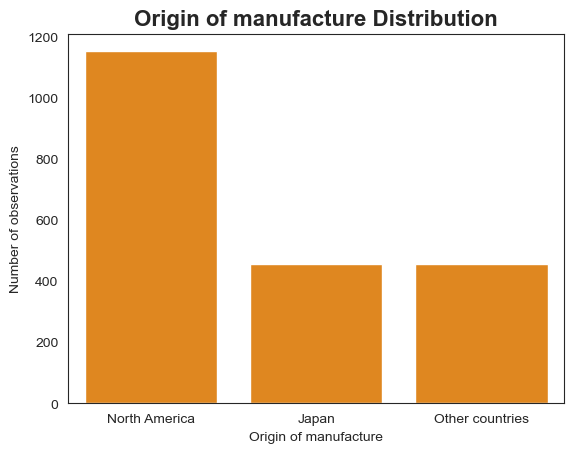

In [28]:
sns.countplot(data=D1Clean3, x='Origin of manufacture', color = '#FF8A00')
plt.title("Origin of manufacture Distribution", fontsize = 16, fontweight = 'bold')
plt.ylabel("Number of observations", fontsize = 10)
plt.xlabel("Origin of manufacture", fontsize = 10)
plt.show()

### Analyzing Numeric and Categorical Variables

#### Vehcile sold by Origin of manufacture

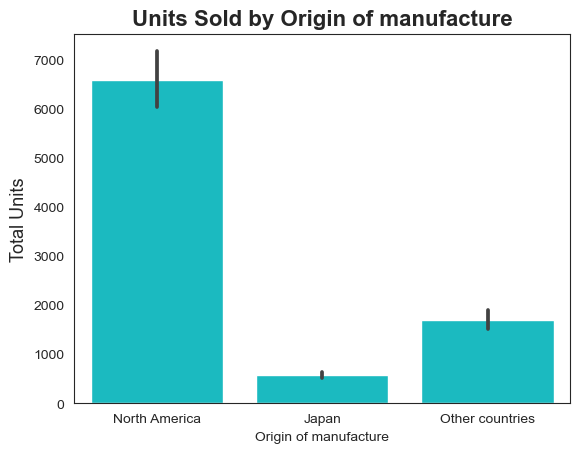

In [29]:
sns.barplot(x="Origin of manufacture", y="Units", data=D1Clean3, color = '#00D3DB')

plt.title("Units Sold by Origin of manufacture", fontsize = 16, fontweight = 'bold')
plt.ylabel("Total Units", fontsize = 13)

plt.show()

In this data set it can be observed that the vehicles sold in Canada, in a large percentage correspond to vehicles manufactured in North America.

#### Total Sales by Vehicle Type

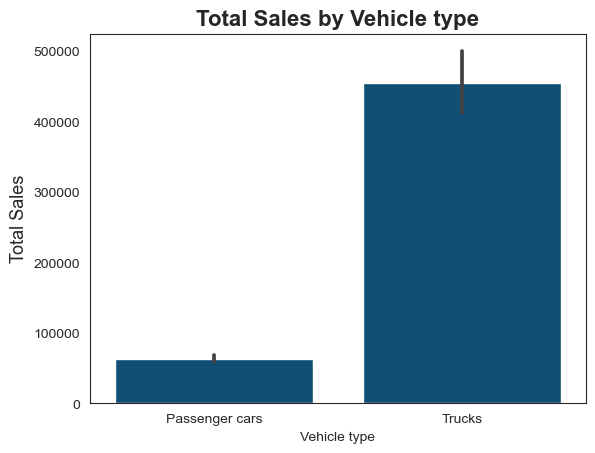

In [30]:
sns.barplot(x="Vehicle type", y="Sales", data=D1Clean3, color = '#015384')

plt.title("Total Sales by Vehicle type", fontsize = 16, fontweight = 'bold')
plt.ylabel("Total Sales", fontsize = 13)


plt.show()

Apparently the sale of trucks generates more income than the sale of passenger cars. This can be presented considering that this type of vehicle is more expensive. This will be part of our final analysis.

## D2- Retail trade sales of motor vehicle and parts  dealers

In [31]:
#Import data
D2 = pd.read_csv('D2- Retail trade sales of motor vehicle and parts  dealers.csv')

In [32]:
#Check first records
D2.head()

,REF_DATE,GEO,DGUID,North American Industry Classification System (NAICS),Adjustments,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1991-01,Canada,2016A000011124,Retail trade [44-45],Unadjusted,Dollars,81,thousands,3,v52367096,1.1.1,12588862.0,NaN,NaN,NaN,0
1,1991-01,Canada,2016A000011124,Retail trade [44-45],Seasonally adjusted,Dollars,81,thousands,3,v52367097,1.1.2,15026890.0,NaN,NaN,NaN,0
2,1991-01,Canada,2016A000011124,Motor vehicle and parts dealers [441],Unadjusted,Dollars,81,thousands,3,v52367118,1.2.1,2484133.0,NaN,NaN,NaN,0
3,1991-01,Canada,2016A000011124,Motor vehicle and parts dealers [441],Seasonally adjusted,Dollars,81,thousands,3,v52367119,1.2.2,3124582.0,NaN,NaN,NaN,0
4,1991-01,Canada,2016A000011124,New car dealers [44111],Unadjusted,Dollars,81,thousands,3,v52367142,1.4.1,2085763.0,NaN,NaN,NaN,0


Analyzing the first records of this data set, we observe that it contains information that is not useful for our analysis. Therefore, in the following code the cleaning of this data set is carried out, considering the following criteria:

• Split the date in two colums for easy analisis. (Year and Month) <br>
• Drop columns that are not necessary for our analysis <br>
• Remove rows that are not necessary for our analysis (The totals) <br>
• Filtering by year to keep the same year range in all data sets (2015-2019) <br>

In [33]:
#Split the Ref Date in two columns
D2split = pd.DataFrame(D2.REF_DATE.str.split('-',1).tolist(),
                                 columns = ['Year','Month',])

#Join the result in the original data set
D2join = D2split.join(D2)

#Drop the column 
D2drop = D2join.drop(columns=['REF_DATE', 'DGUID', 'Adjustments', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 
                              'SCALAR_ID', 'VECTOR', 'COORDINATE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'])

#Change data type of year
D2drop['Year'].astype('int32').dtypes

#variables to filter
NAICS = ['Automotive parts, accessories and tire stores [4413]', 'New car dealers [44111]',
         'Other motor vehicle dealers [4412]','Used car dealers [44112]']

Province = ['Alberta', 'British Columbia', 'Manitoba', 'New Brunswick', 'Newfoundland and Labrador', 'Northwest Territories',
           'Nova Scotia', 'Ontario', 'Prince Edward Island', 'Quebec', 'Saskatchewan']

#Remove unnecessary rows
D2Clean = D2drop[(D2drop['Year'] >= '2015') & (D2drop['Year'] <= '2019') & (D2drop['GEO'].isin(Province)) & 
                 (D2drop['North American Industry Classification System (NAICS)'].isin(NAICS))]

In [34]:
#Check shape and head of the clean data
print(D2Clean.shape)

(2638, 5)


In [35]:
D2Clean.head()

,Year,Month,GEO,North American Industry Classification System (NAICS),VALUE
80870,2015,01,Newfoundland and Labrador,New car dealers [44111],98326.0
80871,2015,01,Newfoundland and Labrador,Used car dealers [44112],7604.0
80872,2015,01,Newfoundland and Labrador,Other motor vehicle dealers [4412],17624.0
80873,2015,01,Newfoundland and Labrador,"Automotive parts, accessories and tire stores ...",8143.0
80900,2015,01,Prince Edward Island,New car dealers [44111],NaN


Now that the dataset contains the information we require for analysis, we will proceed with the validation of the data types and missing data

### Checking data types and missing data

In [36]:
D2Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2638 entries, 80870 to 115431
Data columns (total 5 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Year                                                   2638 non-null   object 
 1   Month                                                  2638 non-null   object 
 2   GEO                                                    2638 non-null   object 
 3   North American Industry Classification System (NAICS)  2638 non-null   object 
 4   VALUE                                                  2312 non-null   float64
dtypes: float64(1), object(4)
memory usage: 123.7+ KB


For the purpose of this analysis, the data type appears to be correct, so in terms of this criterion no modification is necessary.

However, we note that the 'VALUE' variables appears to have missing data.

In [37]:
D2Clean.isnull().sum()

Year                                                       0
Month                                                      0
GEO                                                        0
North American Industry Classification System (NAICS)      0
VALUE                                                    326
dtype: int64

Considering the above, we decided to delete the rows with missing data. This, taking into account that the missing data means that the observation had no sales, in the period of time related in the data set.

In [38]:
#Remove null values
D2Clean = D2Clean[D2Clean['VALUE'].notna()]

In [39]:
#Check null values again
D2Clean.isnull().sum()

Year                                                     0
Month                                                    0
GEO                                                      0
North American Industry Classification System (NAICS)    0
VALUE                                                    0
dtype: int64

In [40]:
#Check the clean data set
D2Clean

,Year,Month,GEO,North American Industry Classification System (NAICS),VALUE
80870,2015,01,Newfoundland and Labrador,New car dealers [44111],98326.0
80871,2015,01,Newfoundland and Labrador,Used car dealers [44112],7604.0
80872,2015,01,Newfoundland and Labrador,Other motor vehicle dealers [4412],17624.0
80873,2015,01,Newfoundland and Labrador,"Automotive parts, accessories and tire stores ...",8143.0
80902,2015,01,Prince Edward Island,Other motor vehicle dealers [4412],1939.0
...,...,...,...,...,...
115335,2019,12,British Columbia,New car dealers [44111],1103315.0
115336,2019,12,British Columbia,Used car dealers [44112],96560.0
115337,2019,12,British Columbia,Other motor vehicle dealers [4412],71197.0
115338,2019,12,British Columbia,"Automotive parts, accessories and tire stores ...",111380.0


### Analyzing Numeric Variables

In [41]:
#Analisis of VALUE variable
round(D2Clean['VALUE'].describe())

count       2312.0
mean      329765.0
std       748347.0
min          483.0
25%        22150.0
50%        91922.0
75%       237343.0
max      5583054.0
Name: VALUE, dtype: float64

In the statistical analysis of the variable sales(VALUE), a large range of numbers is observed between the minimum number and the maximum number. This is because the observation represents the total sales for a particular month of a specific NAICS classification and geographical location (GEO).

#### Dealer sales distribution by year

In [42]:
#Average sales distribution by year
avg_sales = D2Clean.groupby(['Year'])\
.agg({'VALUE':'mean'})\
.rename(columns={'VALUE':'avg_sales'})\
.reset_index()

avg_sales

,Year,avg_sales
0,2015,289694.154185
1,2016,315176.032538
2,2017,342397.759140
3,2018,347826.597849
4,2019,352560.541756


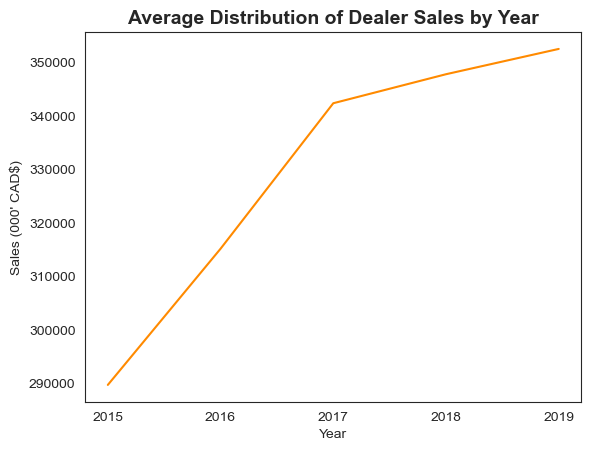

In [43]:
plt.plot(avg_sales["Year"], avg_sales["avg_sales"], color = '#FF8A00')
plt.title("Average Distribution of Dealer Sales by Year", fontsize = 14, fontweight = 'bold')

plt.ylabel("Sales (000' CAD$)")
plt.xlabel("Year")

plt.show()

According to the plot, sales have been increasing since 2016.

Now, we want to find the relationship between the Used Car dealers Sales and Other motor vehicle dealers sales:

In [44]:
new_used_cars = D2Clean.groupby(['Year', 'North American Industry Classification System (NAICS)'])\
.agg({'VALUE':'mean'})\
.rename(columns={'VALUE':'avg_sales'})\
.reset_index()\
.pivot(index='Year', columns = 'North American Industry Classification System (NAICS)', values = 'avg_sales')\
.reset_index()

new_used_cars

North American Industry Classification System (NAICS),Year,"Automotive parts, accessories and tire stores [4413]",New car dealers [44111],Other motor vehicle dealers [4412],Used car dealers [44112]
0,2015,66010.241667,9.932686e+05,68935.703390,75856.472222
1,2016,67874.388430,1.054059e+06,77151.636364,90592.476636
2,2017,78576.083333,1.195428e+06,77469.115385,99146.317757
3,2018,84203.366667,1.201274e+06,79449.196970,108667.419048
4,2019,85779.350000,1.218096e+06,79639.136364,114817.859813


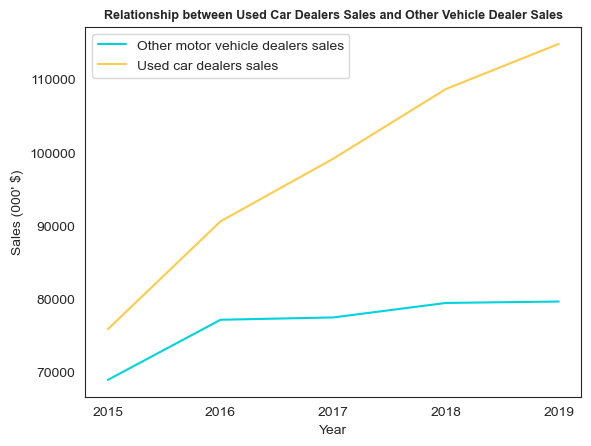

In [45]:
plt.plot(new_used_cars["Year"], new_used_cars["Other motor vehicle dealers [4412]"], color = '#00D3DB')
plt.plot(new_used_cars["Year"], new_used_cars["Used car dealers [44112]"], color = '#FECB4C')

plt.title("Relationship between Used Car Dealers Sales and Other Vehicle Dealer Sales", fontsize = 9, fontweight = 'bold')

plt.ylabel("Sales (000' $)")
plt.xlabel("Year")

labels = ['Other motor vehicle dealers sales', 'Used car dealers sales']
plt.legend(labels = labels, fontsize = 'medium')

plt.show()

In the plot it can be seen that there is a relationship between these two variables.

### Analyzing Categorical Variables

#### GEO Column 

It column represents the provinces of Canada. This variable has 2312 observations with 11 uniques values

In [46]:
D2Clean['GEO'].describe()

count       2312
unique        11
top       Quebec
freq         240
Name: GEO, dtype: object

The next output shows the distribution of the provinces in this data set

In [47]:
D2Clean.GEO.value_counts()

Quebec                       240
British Columbia             240
Newfoundland and Labrador    239
New Brunswick                239
Ontario                      239
Manitoba                     239
Alberta                      239
Nova Scotia                  238
Saskatchewan                 237
Prince Edward Island         120
Northwest Territories         42
Name: GEO, dtype: int64

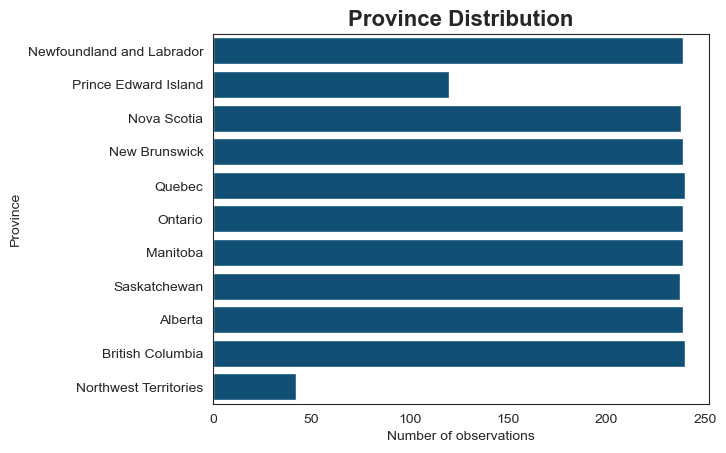

In [48]:
sns.countplot(data=D2Clean, y='GEO', color = '#015384')
plt.title("Province Distribution", fontsize = 16, fontweight = 'bold')
plt.xlabel("Number of observations", fontsize = 10)
plt.ylabel("Province", fontsize = 10)
plt.show()

#### Dealer clasification

It column represents the dealer clasification. This variable has 2312 observations with 4 uniques values

In [49]:
D2Clean['North American Industry Classification System (NAICS)'].describe()

count                                   2312
unique                                     4
top       Other motor vehicle dealers [4412]
freq                                     633
Name: North American Industry Classification System (NAICS), dtype: object

In [50]:
D2Clean['North American Industry Classification System (NAICS)'].value_counts()

Other motor vehicle dealers [4412]                      633
Automotive parts, accessories and tire stores [4413]    601
New car dealers [44111]                                 544
Used car dealers [44112]                                534
Name: North American Industry Classification System (NAICS), dtype: int64

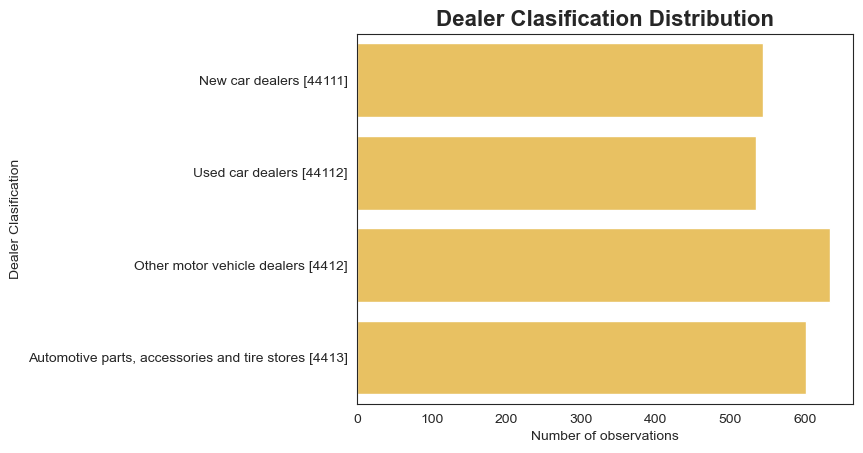

In [51]:
sns.countplot(data=D2Clean, y='North American Industry Classification System (NAICS)', color = '#FECB4C')
plt.title("Dealer Clasification Distribution", fontsize = 16, fontweight = 'bold')
plt.xlabel("Number of observations", fontsize = 10)
plt.ylabel("Dealer Clasification", fontsize = 10)
plt.show()

## D3- New motor vehicle registrations

In [52]:
#Import data
D3 = pd.read_csv('D3- New motor vehicle registrations.csv')

In [53]:
#Check first records
D3.head()

,REF_DATE,GEO,DGUID,Fuel type,Vehicle type,Statistics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2011,Canada,2016A000011124,All fuel types,"Total, vehicle type",Number of vehicles,Units,300,units,0,v1079014832,1.1.1.1,1623288.0,NaN,NaN,NaN,0
1,2011,Canada,2016A000011124,All fuel types,Passenger cars,Number of vehicles,Units,300,units,0,v1079014839,1.1.2.1,667842.0,NaN,NaN,NaN,0
2,2011,Canada,2016A000011124,All fuel types,Pickup trucks,Number of vehicles,Units,300,units,0,v1079014846,1.1.3.1,298728.0,NaN,NaN,NaN,0
3,2011,Canada,2016A000011124,All fuel types,Multi-purpose vehicles,Number of vehicles,Units,300,units,0,v1079014853,1.1.4.1,530754.0,NaN,NaN,NaN,0
4,2011,Canada,2016A000011124,All fuel types,Vans,Number of vehicles,Units,300,units,0,v1079014860,1.1.5.1,125964.0,NaN,NaN,NaN,0


Analyzing the first records of this data set, we observe that it contains information that is not useful for our analysis. Therefore, in the following code the cleaning of this data set is carried out, considering the following criteria:

• Drop columns that are not necessary for our analysis <br>
• Remove rows that are not necessary for our analysis (The totals) <br>
• Filtering by year to keep the same year range in all data sets (2015-2019) <br>

In [54]:
#Drop the column 
D3drop = D3.drop(columns=['DGUID', 'Statistics', 'UOM', 'UOM_ID','SCALAR_FACTOR',  'SCALAR_ID', 'VECTOR', 'COORDINATE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'])

#Remove unnecessary rows
D3filter = D3drop[(D3drop['REF_DATE'] >= 2012) & (D3drop['REF_DATE'] <= 2019) & (D3drop['GEO'] != 'Canada') & (D3drop['Vehicle type'] != 'Total, vehicle type') & (D3drop['Fuel type'] != 'All fuel types')]

In [55]:
D3filter

,REF_DATE,GEO,Fuel type,Vehicle type,VALUE
426,2012,Newfoundland and Labrador,Gasoline,Passenger cars,NaN
427,2012,Newfoundland and Labrador,Gasoline,Pickup trucks,NaN
428,2012,Newfoundland and Labrador,Gasoline,Multi-purpose vehicles,NaN
429,2012,Newfoundland and Labrador,Gasoline,Vans,NaN
431,2012,Newfoundland and Labrador,Diesel,Passenger cars,NaN
...,...,...,...,...,...
3459,2019,British Columbia and the Territories,Plug-in hybrid electric,Vans,206.0
3461,2019,British Columbia and the Territories,Other fuel types,Passenger cars,20.0
3462,2019,British Columbia and the Territories,Other fuel types,Pickup trucks,0.0
3463,2019,British Columbia and the Territories,Other fuel types,Multi-purpose vehicles,7.0


In [56]:
#Split Fuel type in columns
Diesel = D3filter[D3filter['Fuel type'] == 'Diesel']\
.drop(columns=['REF_DATE', 'GEO', 'Fuel type', 'Vehicle type'])\
.rename(columns={'VALUE':'Diesel'})

Hybrid_electric = D3filter[D3filter['Fuel type'] == 'Hybrid electric']\
.drop(columns=['REF_DATE', 'GEO', 'Fuel type', 'Vehicle type'])\
.rename(columns={'VALUE':'Hybrid_electric'})

Battery_electric = D3filter[D3filter['Fuel type'] == 'Battery electric']\
.drop(columns=['REF_DATE', 'GEO', 'Fuel type', 'Vehicle type'])\
.rename(columns={'VALUE':'Battery_electric'})

Plug_in_hybrid_electric = D3filter[D3filter['Fuel type'] == 'Plug-in hybrid electric']\
.drop(columns=['REF_DATE', 'GEO', 'Fuel type', 'Vehicle type'])\
.rename(columns={'VALUE':'Plug_in_hybrid_electric'})

Other_fuel_types = D3filter[D3filter['Fuel type'] == 'Other fuel types']\
.drop(columns=['REF_DATE', 'GEO', 'Fuel type', 'Vehicle type'])\
.rename(columns={'VALUE':'Other_fuel_types'})

Gasoline = D3filter[D3filter['Fuel type'] == 'Gasoline']\
.drop(columns=['Fuel type'])\
.rename(columns={'VALUE':'Gasoline'})

In [57]:
#Join the columns in one data set
Gasoline.insert(loc=4, column='Diesel', value=Diesel)
Gasoline.insert(loc=5, column='Hybrid_electric', value=Hybrid_electric)
Gasoline.insert(loc=6, column='Battery_electric', value=Battery_electric)
Gasoline.insert(loc=7, column='Plug_in_hybrid_electric', value=Plug_in_hybrid_electric)
Gasoline.insert(loc=8, column='Other_fuel_types', value=Other_fuel_types)

In [58]:
#Check first records of the clean data
D3Clean = Gasoline
D3Clean.head()

,REF_DATE,GEO,Vehicle type,Gasoline,Diesel,Hybrid_electric,Battery_electric,Plug_in_hybrid_electric,Other_fuel_types
426,2012,Newfoundland and Labrador,Passenger cars,NaN,NaN,NaN,NaN,NaN,NaN
427,2012,Newfoundland and Labrador,Pickup trucks,NaN,NaN,NaN,NaN,NaN,NaN
428,2012,Newfoundland and Labrador,Multi-purpose vehicles,NaN,NaN,NaN,NaN,NaN,NaN
429,2012,Newfoundland and Labrador,Vans,NaN,NaN,NaN,NaN,NaN,NaN
461,2012,Prince Edward Island,Passenger cars,3422.0,49.0,113.0,2.0,1.0,0.0


Now that the dataset contains the information we require for analysis, we will proceed with the validation of the data types and missing data

### Checking data types and missing data

In [59]:
D3Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 426 to 3439
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   REF_DATE                 320 non-null    int64  
 1   GEO                      320 non-null    object 
 2   Vehicle type             320 non-null    object 
 3   Gasoline                 224 non-null    float64
 4   Diesel                   224 non-null    float64
 5   Hybrid_electric          224 non-null    float64
 6   Battery_electric         224 non-null    float64
 7   Plug_in_hybrid_electric  224 non-null    float64
 8   Other_fuel_types         224 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 25.0+ KB


For the purpose of this analysis, the data type appears to be correct, so in terms of this criterion no modification is necessary. <br>

However, we note that the 'VALUE' variables appears to have missing data.

In [60]:
D3Clean.isnull().sum()

REF_DATE                    0
GEO                         0
Vehicle type                0
Gasoline                   96
Diesel                     96
Hybrid_electric            96
Battery_electric           96
Plug_in_hybrid_electric    96
Other_fuel_types           96
dtype: int64

Considering the above, we decided to delete the rows with missing data. This, taking into account that the missing data means that the observation had no car registration, in the period of time related in the data set.

In [61]:
#Remove null values
D3Clean1 = D3Clean[D3Clean['Gasoline'].notna() & D3Clean['Diesel'].notna() & D3Clean['Hybrid_electric'].notna() &
                  D3Clean['Battery_electric'].notna() & D3Clean['Plug_in_hybrid_electric'].notna() & D3Clean['Other_fuel_types'].notna()]

In [62]:
#Check null values again
D3Clean1.isnull().sum()

REF_DATE                   0
GEO                        0
Vehicle type               0
Gasoline                   0
Diesel                     0
Hybrid_electric            0
Battery_electric           0
Plug_in_hybrid_electric    0
Other_fuel_types           0
dtype: int64

In [63]:
#Check the clean data set
D3Clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 461 to 3439
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   REF_DATE                 224 non-null    int64  
 1   GEO                      224 non-null    object 
 2   Vehicle type             224 non-null    object 
 3   Gasoline                 224 non-null    float64
 4   Diesel                   224 non-null    float64
 5   Hybrid_electric          224 non-null    float64
 6   Battery_electric         224 non-null    float64
 7   Plug_in_hybrid_electric  224 non-null    float64
 8   Other_fuel_types         224 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 17.5+ KB


### Analyzing Numeric Variables

This analysis will be carried out with the vehicle registration of Hybrid electric and Battery electric cars.

In [64]:
D3Clean1['Hybrid_electric'].describe()

count     224.000000
mean      748.620536
std      1639.025209
min         0.000000
25%         0.000000
50%         8.000000
75%       263.250000
max      7711.000000
Name: Hybrid_electric, dtype: float64

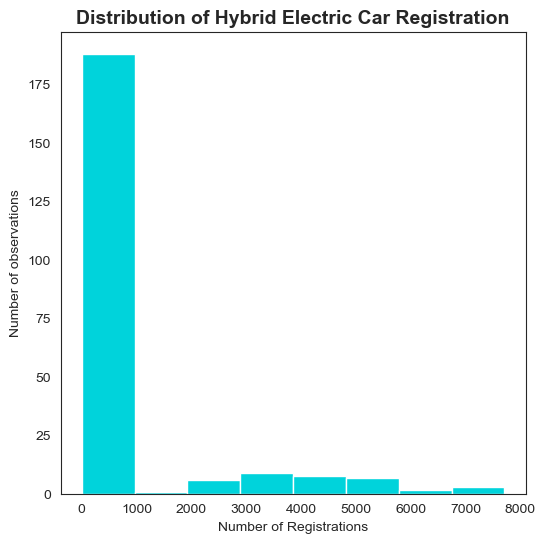

In [122]:
#Plot
sns.set_style("white")

fig, ax=plt.subplots(figsize = (6, 6))

plt.hist(D3Clean1['Hybrid_electric'], 
         bins = 8, 
        color = "#00D3DB")
plt.title('Distribution of Hybrid Electric Car Registration', fontsize = 14, weight = 'bold')
plt.xlabel("Number of Registrations")
plt.ylabel("Number of observations")

plt.show()

In [66]:
D3Clean1['Battery_electric'].describe()

count      224.000000
mean       353.522321
std       1372.428838
min          0.000000
25%          0.000000
50%          0.000000
75%         11.250000
max      11756.000000
Name: Battery_electric, dtype: float64

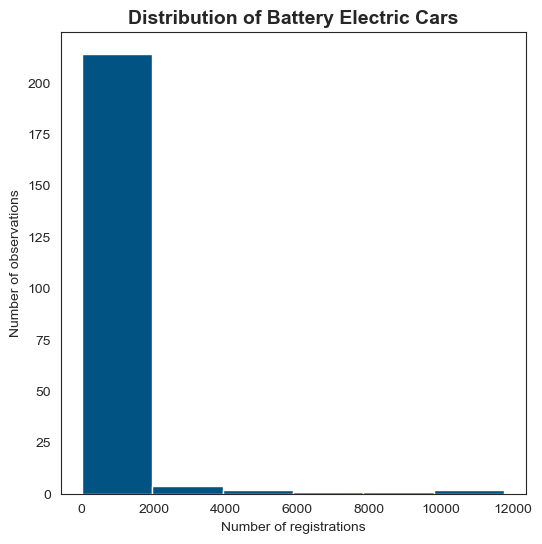

In [67]:
sns.set_style("white")

fig, ax=plt.subplots(figsize = (6, 6))

plt.hist(D3Clean1['Battery_electric'], 
         bins = 6, 
        color = "#015384")
plt.title('Distribution of Battery Electric Cars', fontsize = 14, weight = 'bold')
plt.xlabel("Number of registrations")
plt.ylabel("Number of observations")

plt.show()

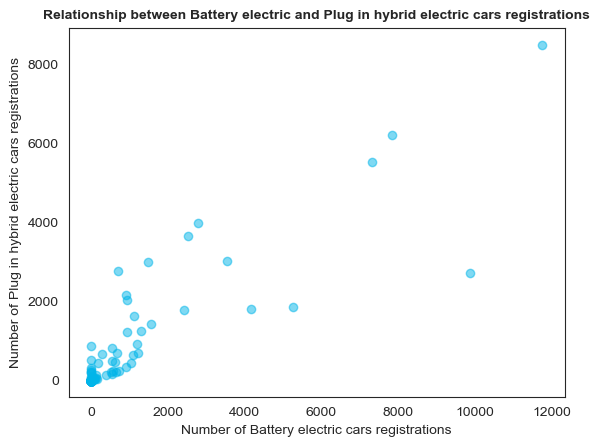

In [68]:
scatter = plt.scatter(D3Clean1['Battery_electric'],
           D3Clean1['Plug_in_hybrid_electric'],
           alpha = 0.5,
                     color = '#00B5E9')
plt.title("Relationship between Battery electric and Plug in hybrid electric cars registrations",
         fontsize = 10,
         weight = 'bold')
plt.xlabel("Number of Battery electric cars registrations")
plt.ylabel("Number of Plug in hybrid electric cars registrations")

plt.show()

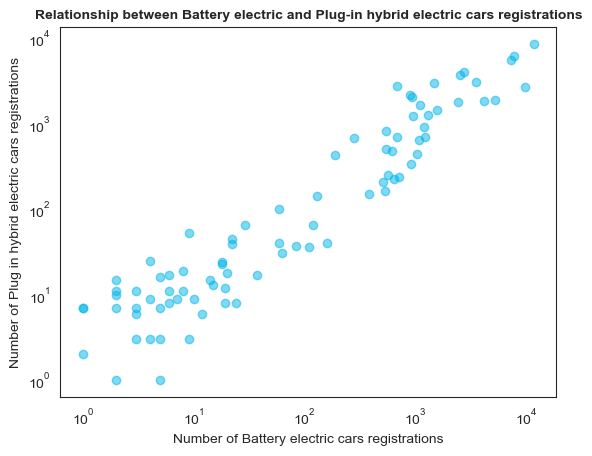

In [69]:
scatter = plt.scatter(D3Clean1['Battery_electric'],
           D3Clean1['Plug_in_hybrid_electric'],
           alpha = 0.5,
                     color = '#00B5E9')

plt.title("Relationship between Battery electric and Plug-in hybrid electric cars registrations",
         fontsize = 10,
         weight = 'bold')
plt.xlabel("Number of Battery electric cars registrations")
plt.ylabel("Number of Plug in hybrid electric cars registrations")


plt.yscale("log")
plt.xscale("log")
plt.show()

### Analyzing Categorical Variables

#### GEO Column 

It column represents the provinces of Canada. This variable has 224 observations with 7 uniques values

In [70]:
D3Clean1['GEO'].describe()

count                      224
unique                       7
top       Prince Edward Island
freq                        32
Name: GEO, dtype: object

The next output shows the distribution of the provinces in this data set

In [71]:
D3Clean1.GEO.value_counts()

Prince Edward Island                    32
New Brunswick                           32
Quebec                                  32
Ontario                                 32
Manitoba                                32
Saskatchewan                            32
British Columbia and the Territories    32
Name: GEO, dtype: int64

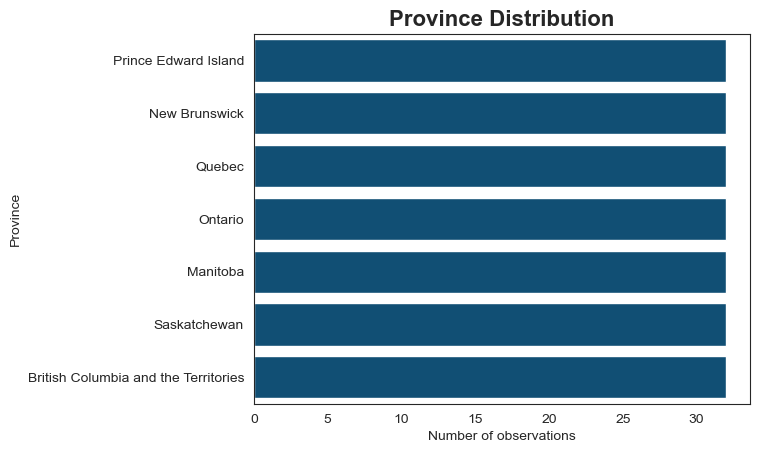

In [72]:
sns.countplot(data=D3Clean1, y='GEO', color = '#015384')
plt.title("Province Distribution", fontsize = 16, fontweight = 'bold')
plt.xlabel("Number of observations", fontsize = 10)
plt.ylabel("Province", fontsize = 10)
plt.show()

#### Vehicle Type Column 

It column represents the vehicle type sold. This variable has 224 observations with 4 uniques values

In [73]:
D3Clean1['Vehicle type'].describe()

count                224
unique                 4
top       Passenger cars
freq                  56
Name: Vehicle type, dtype: object

The next output shows the distribution of the Vehicle Type in this data set

In [74]:
D3Clean1['Vehicle type'].value_counts()

Passenger cars            56
Pickup trucks             56
Multi-purpose vehicles    56
Vans                      56
Name: Vehicle type, dtype: int64

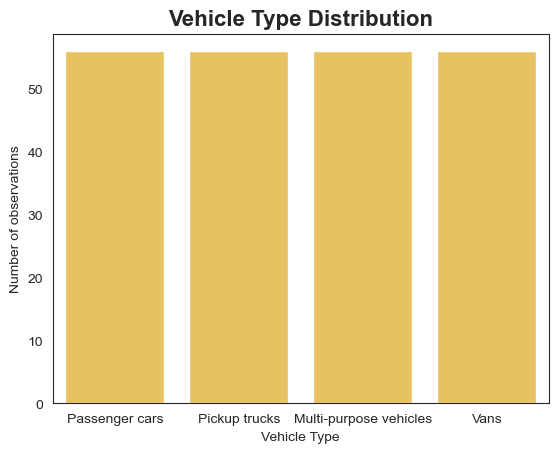

In [75]:
sns.countplot(data=D3Clean1, x='Vehicle type', color = '#FECB4C')
plt.title("Vehicle Type Distribution", fontsize = 16, fontweight = 'bold')
plt.ylabel("Number of observations", fontsize = 10)
plt.xlabel("Vehicle Type", fontsize = 10)
plt.show()

## D4- Financial estimates of motor vehicle and parts dealers

In [93]:
#Import data
D4 = pd.read_csv('D4- Financial estimates of motor vehicle and parts dealers.csv')

In [94]:
D4.head()

,REF_DATE,GEO,DGUID,North American Industry Classification System (NAICS),Financial estimates,Type of store,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2012,Canada,2016A000011124,Retail trade [44-45],Sales of goods for resale,Total all stores,Dollars,81,thousands,3,v101257054,1.1.1.1,482166179.0,NaN,NaN,NaN,0
1,2012,Canada,2016A000011124,Retail trade [44-45],Sales of goods for resale,Chain stores,Dollars,81,thousands,3,v101257055,1.1.1.2,233631528.0,NaN,NaN,NaN,0
2,2012,Canada,2016A000011124,Retail trade [44-45],Sales of goods for resale,Non-chain stores,Dollars,81,thousands,3,v101257056,1.1.1.3,248534651.0,NaN,NaN,NaN,0
3,2012,Canada,2016A000011124,Retail trade [44-45],Total operating revenue,Total all stores,Dollars,81,thousands,3,v101257057,1.1.2.1,491316297.0,NaN,NaN,NaN,0
4,2012,Canada,2016A000011124,Retail trade [44-45],Total operating revenue,Chain stores,Dollars,81,thousands,3,v101257058,1.1.2.2,235862535.0,NaN,NaN,NaN,0


Analyzing the first records of this data set, we observe that it contains information that is not useful for our analysis. Therefore, in the following code the cleaning of this data set is carried out, considering the following criteria:

• Drop columns that are not necessary for our analysis <br>
• Remove rows that are not necessary for our analysis (The totals, unrelated column categories) <br>
• Filtering by year to keep the same year range in all data sets (2015-2019) <br>

In [95]:
#Drop the column not useful for this analysis
D4drop = D4.drop(columns=['DGUID', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'])

In [96]:
# Remove rows that are not necessary for our analysis (Year, The totals, unrelated column categories)

listCategorie = ['Automotive parts, accessories and tire stores [4413]', 'New car dealers [44111]','Other motor vehicle dealers [4412]','Used car dealers [44112]']

listYear = [2015, 2016, 2017, 2018, 2019]

D4Clean = D4drop[(D4drop['REF_DATE'].isin(listYear)) & (D4drop['GEO'] != 'Canada') & (D4drop["North American Industry Classification System (NAICS)"].isin(listCategorie)) & (D4drop['Type of store'] == 'Total all stores')]

D4Clean

,REF_DATE,GEO,North American Industry Classification System (NAICS),Financial estimates,Type of store,UOM,VALUE
37500,2015,Newfoundland and Labrador,New car dealers [44111],Sales of goods for resale,Total all stores,Dollars,1755398.0
37503,2015,Newfoundland and Labrador,New car dealers [44111],Total operating revenue,Total all stores,Dollars,1857697.0
37506,2015,Newfoundland and Labrador,New car dealers [44111],Opening inventory,Total all stores,Dollars,362163.0
37509,2015,Newfoundland and Labrador,New car dealers [44111],Purchases,Total all stores,Dollars,1595787.0
37512,2015,Newfoundland and Labrador,New car dealers [44111],Closing inventory,Total all stores,Dollars,359335.0
...,...,...,...,...,...,...,...
81245,2019,Nunavut,"Automotive parts, accessories and tire stores ...",Cost of goods sold,Total all stores,Dollars,NaN
81246,2019,Nunavut,"Automotive parts, accessories and tire stores ...",Total labour remuneration,Total all stores,Dollars,NaN
81247,2019,Nunavut,"Automotive parts, accessories and tire stores ...",Total operating expenses,Total all stores,Dollars,NaN
81248,2019,Nunavut,"Automotive parts, accessories and tire stores ...",Gross margin,Total all stores,Percent,NaN


In [97]:
#Split Financial estimates in columns
Closing_Inventory = D4Clean[D4Clean['Financial estimates'] == 'Closing inventory']\
.drop(columns=['REF_DATE', 'GEO', 'North American Industry Classification System (NAICS)', 'Financial estimates', 
               'Type of store', 'UOM'])\
.rename(columns={'VALUE':'Closing_Inventory'})

Cost_Goods = D4Clean[D4Clean['Financial estimates'] == 'Cost of goods sold']\
.drop(columns=['REF_DATE', 'GEO', 'North American Industry Classification System (NAICS)', 'Financial estimates', 
               'Type of store', 'UOM'])\
.rename(columns={'VALUE':'Cost_Goods'})

Gross_Margin = D4Clean[D4Clean['Financial estimates'] == 'Gross margin']\
.drop(columns=['REF_DATE', 'GEO', 'North American Industry Classification System (NAICS)', 'Financial estimates', 
               'Type of store', 'UOM'])\
.rename(columns={'VALUE':'Gross_Margin'})

Opening_Inventory = D4Clean[D4Clean['Financial estimates'] == 'Opening inventory']\
.drop(columns=['REF_DATE', 'GEO', 'North American Industry Classification System (NAICS)', 'Financial estimates', 
               'Type of store', 'UOM'])\
.rename(columns={'VALUE':'Opening_Inventory'})

Profit_Margin = D4Clean[D4Clean['Financial estimates'] == 'Operating profit margin']\
.drop(columns=['REF_DATE', 'GEO', 'North American Industry Classification System (NAICS)', 'Financial estimates', 
               'Type of store', 'UOM'])\
.rename(columns={'VALUE':'Profit_Margin'})

Purchases = D4Clean[D4Clean['Financial estimates'] == 'Purchases']\
.drop(columns=['REF_DATE', 'GEO', 'North American Industry Classification System (NAICS)', 'Financial estimates', 
               'Type of store', 'UOM'])\
.rename(columns={'VALUE':'Purchases'})

Sales_Goods = D4Clean[D4Clean['Financial estimates'] == 'Sales of goods for resale']\
.drop(columns=['REF_DATE', 'GEO', 'North American Industry Classification System (NAICS)', 'Financial estimates', 
               'Type of store', 'UOM'])\
.rename(columns={'VALUE':'Sales_Goods'})

Labour_Remuneration = D4Clean[D4Clean['Financial estimates'] == 'Total labour remuneration']\
.drop(columns=['REF_DATE', 'GEO', 'North American Industry Classification System (NAICS)', 'Financial estimates', 
               'Type of store', 'UOM'])\
.rename(columns={'VALUE':'Labour_Remuneration'})

Operating_Expenses = D4Clean[D4Clean['Financial estimates'] == 'Total operating expenses']\
.drop(columns=['REF_DATE', 'GEO', 'North American Industry Classification System (NAICS)', 'Financial estimates', 
               'Type of store', 'UOM'])\
.rename(columns={'VALUE':'Operating_Expenses'})

Operating_Revenue = D4Clean[D4Clean['Financial estimates'] == 'Total operating revenue']\
.drop(columns=['Financial estimates','Type of store', 'UOM'])\
.rename(columns={'VALUE':'Operating_Revenue'})

In [98]:
#Join the columns in one data set
Operating_Revenue.insert(loc=4, column='Closing_Inventory', value=Closing_Inventory)
Operating_Revenue.insert(loc=5, column='Cost_Goods', value=Cost_Goods)
Operating_Revenue.insert(loc=6, column='Gross_Margin', value=Gross_Margin)
Operating_Revenue.insert(loc=7, column='Opening_Inventory', value=Opening_Inventory)
Operating_Revenue.insert(loc=8, column='Profit_Margin', value=Profit_Margin)
Operating_Revenue.insert(loc=9, column='Purchases', value=Purchases)
Operating_Revenue.insert(loc=10, column='Sales_Goods', value=Sales_Goods)
Operating_Revenue.insert(loc=11, column='Labour_Remuneration', value=Labour_Remuneration)
Operating_Revenue.insert(loc=12, column='Operating_Expenses', value=Operating_Expenses)

In [99]:
D4Pivot = Operating_Revenue

In [100]:
#Check first records of the clean data
D4Pivot.head()

,REF_DATE,GEO,North American Industry Classification System (NAICS),Operating_Revenue,Closing_Inventory,Cost_Goods,Gross_Margin,Opening_Inventory,Profit_Margin,Purchases,Sales_Goods,Labour_Remuneration,Operating_Expenses
37503,2015,Newfoundland and Labrador,New car dealers [44111],1857697.0,359335.0,1598614.0,13.9,362163.0,2.6,1595787.0,1755398.0,101108.0,210762.0
37533,2015,Newfoundland and Labrador,Used car dealers [44112],146763.0,28355.0,125122.0,14.7,27302.0,2.9,126174.0,140943.0,10397.0,17315.0
37563,2015,Newfoundland and Labrador,Other motor vehicle dealers [4412],315494.0,140074.0,244593.0,22.5,97956.0,4.4,286710.0,303456.0,32643.0,57149.0
37593,2015,Newfoundland and Labrador,"Automotive parts, accessories and tire stores ...",169338.0,41744.0,105542.0,37.7,40128.0,4.9,107158.0,160363.0,34076.0,55531.0
38373,2015,Prince Edward Island,New car dealers [44111],405845.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
#Check last records of the clean data
D4Pivot.tail()

,REF_DATE,GEO,North American Industry Classification System (NAICS),Operating_Revenue,Closing_Inventory,Cost_Goods,Gross_Margin,Opening_Inventory,Profit_Margin,Purchases,Sales_Goods,Labour_Remuneration,Operating_Expenses
80941,2019,Northwest Territories,"Automotive parts, accessories and tire stores ...",NaN,NaN,17217.0,NaN,NaN,NaN,16555.0,18700.0,2279.0,3524.0
81211,2019,Nunavut,New car dealers [44111],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81221,2019,Nunavut,Used car dealers [44112],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81231,2019,Nunavut,Other motor vehicle dealers [4412],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81241,2019,Nunavut,"Automotive parts, accessories and tire stores ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Checking data types and missing data

In [102]:
D4Pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 37503 to 81241
Data columns (total 13 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   REF_DATE                                               260 non-null    int64  
 1   GEO                                                    260 non-null    object 
 2   North American Industry Classification System (NAICS)  260 non-null    object 
 3   Operating_Revenue                                      205 non-null    float64
 4   Closing_Inventory                                      205 non-null    float64
 5   Cost_Goods                                             206 non-null    float64
 6   Gross_Margin                                           198 non-null    float64
 7   Opening_Inventory                                      204 non-null    float64
 8   Profit_Margin                               

For the purpose of this analysis, the data type appears to be correct, so in terms of this criterion no modification is necessary. <br>

However, it is observed that the Financial Estimates variables appears to have some missing data which should be identified

In [103]:
#Identify the missing data
D4Pivot.isnull().sum()

REF_DATE                                                  0
GEO                                                       0
North American Industry Classification System (NAICS)     0
Operating_Revenue                                        55
Closing_Inventory                                        55
Cost_Goods                                               54
Gross_Margin                                             62
Opening_Inventory                                        56
Profit_Margin                                            64
Purchases                                                54
Sales_Goods                                              54
Labour_Remuneration                                      53
Operating_Expenses                                       54
dtype: int64

Considering the above, we decided to fill the missing data rows with 0.

In [104]:
#Fill na rows with value 0
D4Clean2 = D4Pivot.fillna(0)
D4Clean2

,REF_DATE,GEO,North American Industry Classification System (NAICS),Operating_Revenue,Closing_Inventory,Cost_Goods,Gross_Margin,Opening_Inventory,Profit_Margin,Purchases,Sales_Goods,Labour_Remuneration,Operating_Expenses
37503,2015,Newfoundland and Labrador,New car dealers [44111],1857697.0,359335.0,1598614.0,13.9,362163.0,2.6,1595787.0,1755398.0,101108.0,210762.0
37533,2015,Newfoundland and Labrador,Used car dealers [44112],146763.0,28355.0,125122.0,14.7,27302.0,2.9,126174.0,140943.0,10397.0,17315.0
37563,2015,Newfoundland and Labrador,Other motor vehicle dealers [4412],315494.0,140074.0,244593.0,22.5,97956.0,4.4,286710.0,303456.0,32643.0,57149.0
37593,2015,Newfoundland and Labrador,"Automotive parts, accessories and tire stores ...",169338.0,41744.0,105542.0,37.7,40128.0,4.9,107158.0,160363.0,34076.0,55531.0
38373,2015,Prince Edward Island,New car dealers [44111],405845.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80941,2019,Northwest Territories,"Automotive parts, accessories and tire stores ...",0.0,0.0,17217.0,0.0,0.0,0.0,16555.0,18700.0,2279.0,3524.0
81211,2019,Nunavut,New car dealers [44111],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81221,2019,Nunavut,Used car dealers [44112],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81231,2019,Nunavut,Other motor vehicle dealers [4412],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
#Check null values again
D4Clean2.isnull().sum()

REF_DATE                                                 0
GEO                                                      0
North American Industry Classification System (NAICS)    0
Operating_Revenue                                        0
Closing_Inventory                                        0
Cost_Goods                                               0
Gross_Margin                                             0
Opening_Inventory                                        0
Profit_Margin                                            0
Purchases                                                0
Sales_Goods                                              0
Labour_Remuneration                                      0
Operating_Expenses                                       0
dtype: int64

#### Analyzing Numeric Variables

In [106]:
D4Clean2['Gross_Margin'].describe()

count    260.000000
mean      17.223846
std       12.236652
min        0.000000
25%       12.175000
50%       16.450000
75%       22.725000
max       41.300000
Name: Gross_Margin, dtype: float64

In [107]:
np.median(D4Clean2['Gross_Margin'])

16.45

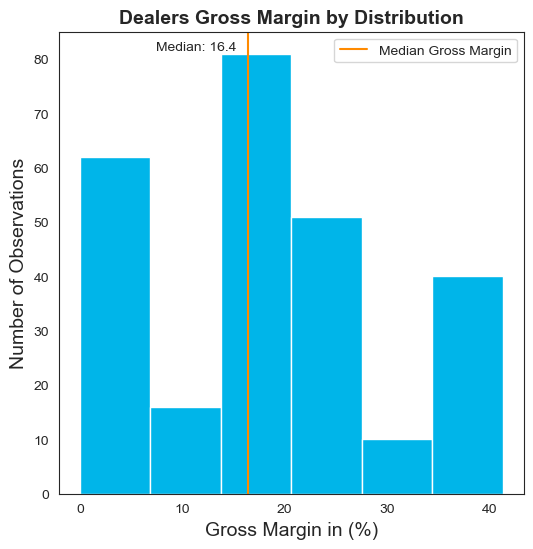

In [124]:
#Calculate median
median_GrossMargin = np.median(D4Clean2['Gross_Margin'])

#Plot
sns.set_style("white")

fig, ax=plt.subplots(figsize = (6, 6))

plt.hist(D4Clean2['Gross_Margin'], 
         bins = 6,
        color = "#00B5E9")
plt.title('Dealers Gross Margin by Distribution', fontsize = 14, weight = 'bold')
plt.xlabel("Gross Margin in (%)", fontsize = 14)
plt.ylabel("Number of Observations",fontsize = 14 )

ax.axvline(median_GrossMargin, color='#FF8A00', label="Median Gross Margin")
ax.legend()

plt.annotate('Median: 16.4', xy=(20, 1),  xycoords='data',
            xytext=(0.21, 0.96), textcoords='axes fraction')
plt.show()

In [109]:
round(D4Clean2['Cost_Goods'].describe())

count         260.0
mean      2556159.0
std       6933240.0
min             0.0
25%         17023.0
50%        277047.0
75%       1745891.0
max      47614062.0
Name: Cost_Goods, dtype: float64

In [110]:
np.median(D4Clean2['Cost_Goods'])

277047.0

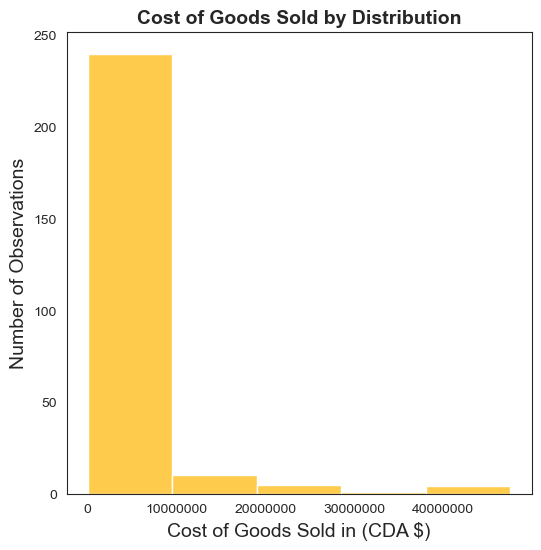

In [126]:
#Plot
sns.set_style("white")

fig, ax=plt.subplots(figsize = (6, 6))

plt.hist(D4Clean2['Cost_Goods'], 
         bins = 5, 
        color = "#FECB4C")
plt.title('Cost of Goods Sold by Distribution', fontsize = 14, weight = 'bold')
plt.xlabel("Cost of Goods Sold in (CDA $)" , fontsize = 14)
plt.ylabel("Number of Observations" , fontsize = 14)

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: '%.0f'%x))

plt.show()

Relationship between Closing Inventory and Opening Inventory

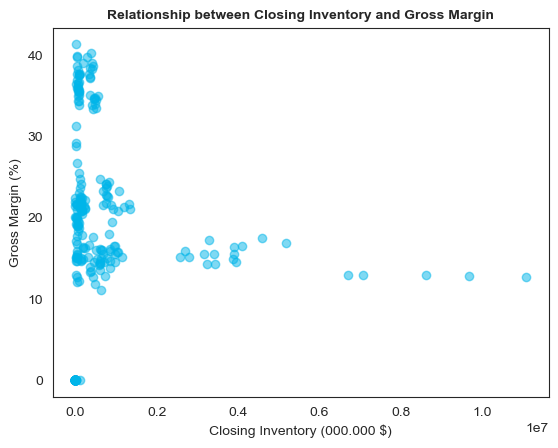

In [133]:
scatter = plt.scatter(D4Clean2['Closing_Inventory'],
           D4Clean2['Gross_Margin'],
           alpha = 0.5,
                     color = '#00B5E9')
plt.title("Relationship between Closing Inventory and Gross Margin",
         fontsize = 10,
         weight = 'bold')
plt.xlabel("Closing Inventory (000.000 $)")
plt.ylabel("Gross Margin (%)")
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: '%.0f'%x))
plt.show()

## D5- Population estimates

In [78]:
#Import data
D5 = pd.read_csv('D5- Population estimates.csv')

In [79]:
#Check first records
D5.head()

,REF_DATE,GEO,DGUID,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1946-01,Canada,2016A000011124,Persons,249,units,0,v1,1,12188000,NaN,NaN,NaN,0
1,1946-04,Canada,2016A000011124,Persons,249,units,0,v1,1,12241000,NaN,NaN,NaN,0
2,1946-07,Canada,2016A000011124,Persons,249,units,0,v1,1,12316000,NaN,NaN,NaN,0
3,1946-10,Canada,2016A000011124,Persons,249,units,0,v1,1,12393000,NaN,NaN,NaN,0
4,1947-01,Canada,2016A000011124,Persons,249,units,0,v1,1,12450000,NaN,NaN,NaN,0


Analyzing the first records of this data set, we observe that it contains information that is not useful for our analysis. Therefore, in the following code the cleaning of this data set is carried out, considering the following criteria:

• Split the date in two colums for easy analisis. (Year and Month) <br>
• Drop columns that are not necessary for our analysis <br>
• Remove rows that are not necessary for our analysis (The totals) <br>
• Filtering by year to keep the same year range in all data sets (2015-2019) <br>

In [80]:
#Split the Ref Date in two columns
D5split = pd.DataFrame(D5.REF_DATE.str.split('-',1).tolist(), columns = ['Year','Month',])

#Join the result in the original data set
D5join = D5split.join(D5)

#Drop the column 
D5drop = D5join.drop(columns=['REF_DATE', 'DGUID', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'])

#Change data type of year
D5drop['Year'].astype('int32').dtypes

#Remove unnecessary rows
D5Clean = D5drop[(D5drop['Year'] >= '2015') & (D5drop['Year'] <= '2019') & (D5drop['GEO'] != 'Canada')]

In [81]:
#Check first records of the clean data
D5Clean.tail()

,Year,Month,GEO,VALUE
3694,2019,10,Alberta,4384982
3695,2019,10,British Columbia,5130251
3696,2019,10,Yukon,41648
3697,2019,10,Northwest Territories,45189
3698,2019,10,Nunavut,38625


In [82]:
D5Clean.shape

(260, 4)

### Checking data types and missing data

In [83]:
#Change data type of year
D5Clean['VALUE'].astype('int32').dtypes

dtype('int32')

In [84]:
#Check data type
D5Clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 3420 to 3698
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    260 non-null    object
 1   Month   260 non-null    object
 2   GEO     260 non-null    object
 3   VALUE   260 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 10.2+ KB


In [85]:
#Check missing data
D5Clean.isnull().sum()

Year     0
Month    0
GEO      0
VALUE    0
dtype: int64

For the purpose of this analysis, the data type appears to be correct, so in terms of this criterion no modification is necessary.

### Analyzing Numeric Variable

In [86]:
#Analisis of population variable
round(D5Clean['VALUE'].describe())

count         260.0
mean      2811822.0
std       4044374.0
min         36219.0
25%        145638.0
50%        948746.0
75%       4303122.0
max      14638247.0
Name: VALUE, dtype: float64

This data set shows population records between a minimum of 36,219 inhabitants and a maximum of 14,638,247 inhabitants.

In [87]:
#Average population by year
avg_pop = D5Clean.groupby('Year').agg({'VALUE':'mean'}).reset_index().astype('int')
avg_pop


,Year,VALUE
0,2015,2744466
1,2016,2773262
2,2017,2807280
3,2018,2846390
4,2019,2887707


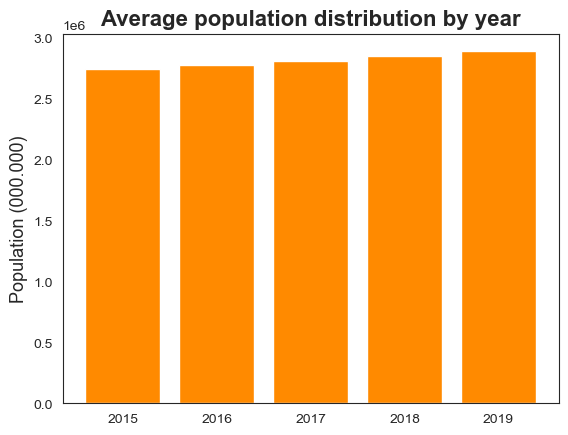

In [131]:
plt.bar(x= avg_pop["Year"],
       height = avg_pop["VALUE"],
       color = "#FF8A00")

plt.title("Average population distribution by year", fontsize = 16, fontweight = 'bold')
plt.ylabel("Population (000.000)", fontsize = 13)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: ('%.1f')%(x*1e9)))
plt.show()

### Analyzing Categorical Variables

#### GEO Column 

It column represents the provinces of Canada. This variable has 260 observations with 13 uniques values

In [89]:
D5Clean['GEO'].describe()

count                           260
unique                           13
top       Newfoundland and Labrador
freq                             20
Name: GEO, dtype: object

The next output shows the distribution of the provinces in this data set

In [90]:
D5Clean.GEO.value_counts()

Newfoundland and Labrador    20
Prince Edward Island         20
Nova Scotia                  20
New Brunswick                20
Quebec                       20
Ontario                      20
Manitoba                     20
Saskatchewan                 20
Alberta                      20
British Columbia             20
Yukon                        20
Northwest Territories        20
Nunavut                      20
Name: GEO, dtype: int64

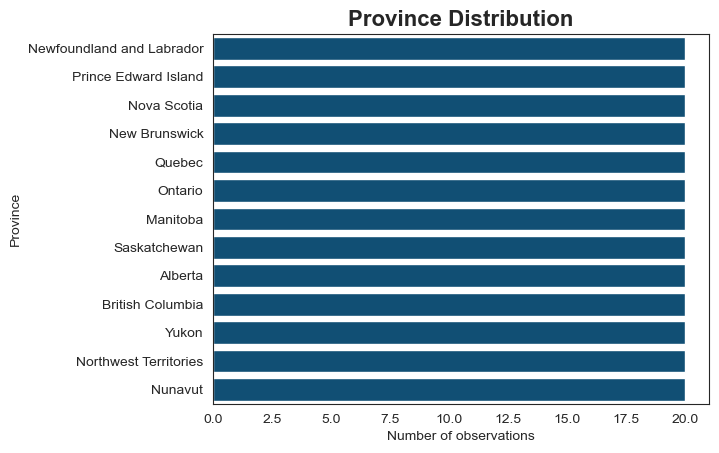

In [91]:
sns.countplot(data=D5Clean, y='GEO', color = '#015384')
plt.title("Province Distribution", fontsize = 16, fontweight = 'bold')
plt.xlabel("Number of observations", fontsize = 10)
plt.ylabel("Province", fontsize = 10)
plt.show()